<a href="https://colab.research.google.com/github/Hemanthghs/Cotton-Leaf-Disease-Detection-using-Deep-Learning/blob/main/Copy_of_Cotton_Leaf_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Cotton Leaf Disease Detection</b></h1><center>


<h1>Abstract</h1>
<p>According to the United Nations Food and Agriculture Organization, more than 45% of the world's population depends on agriculture for survival. Agriculture is the single largest employer in the world. Agriculture is the major source of raw materials for many industries starting from food to textile industries.</p>
<p>When it comes to textile industries, they are largely dependent on cotton production.
Growing the cotton crop requires continuous monitoring to identify the diseased plants in the field and then take the necessary measures. If the crop is not monitored regularly, the disease can spread across the entire crop which ultimately decreases cotton production.</p>
<p>Monitoring large cotton fields manually is a difficult and time-consuming task. Emerging technologies like Artificial Intelligence, Drones, and IoT can help in this task. Drones that are enabled with high-resolution cameras and integrated with Deep Learning, Computer Vision software can help monitoring the entire cotton field and identify the diseased regions of the crop in less time. This can help the farmers in taking immediate action and reduces the manual task of monitoring leading to better production.</p>


<h2>About the Project</h2>
<p>This project is about developing a Deep Learning model using Convolutional Neural Networks which can detect the diseased cotton leaf i.e., to classify whether a given cotton leaf is fresh or diseased.</p>

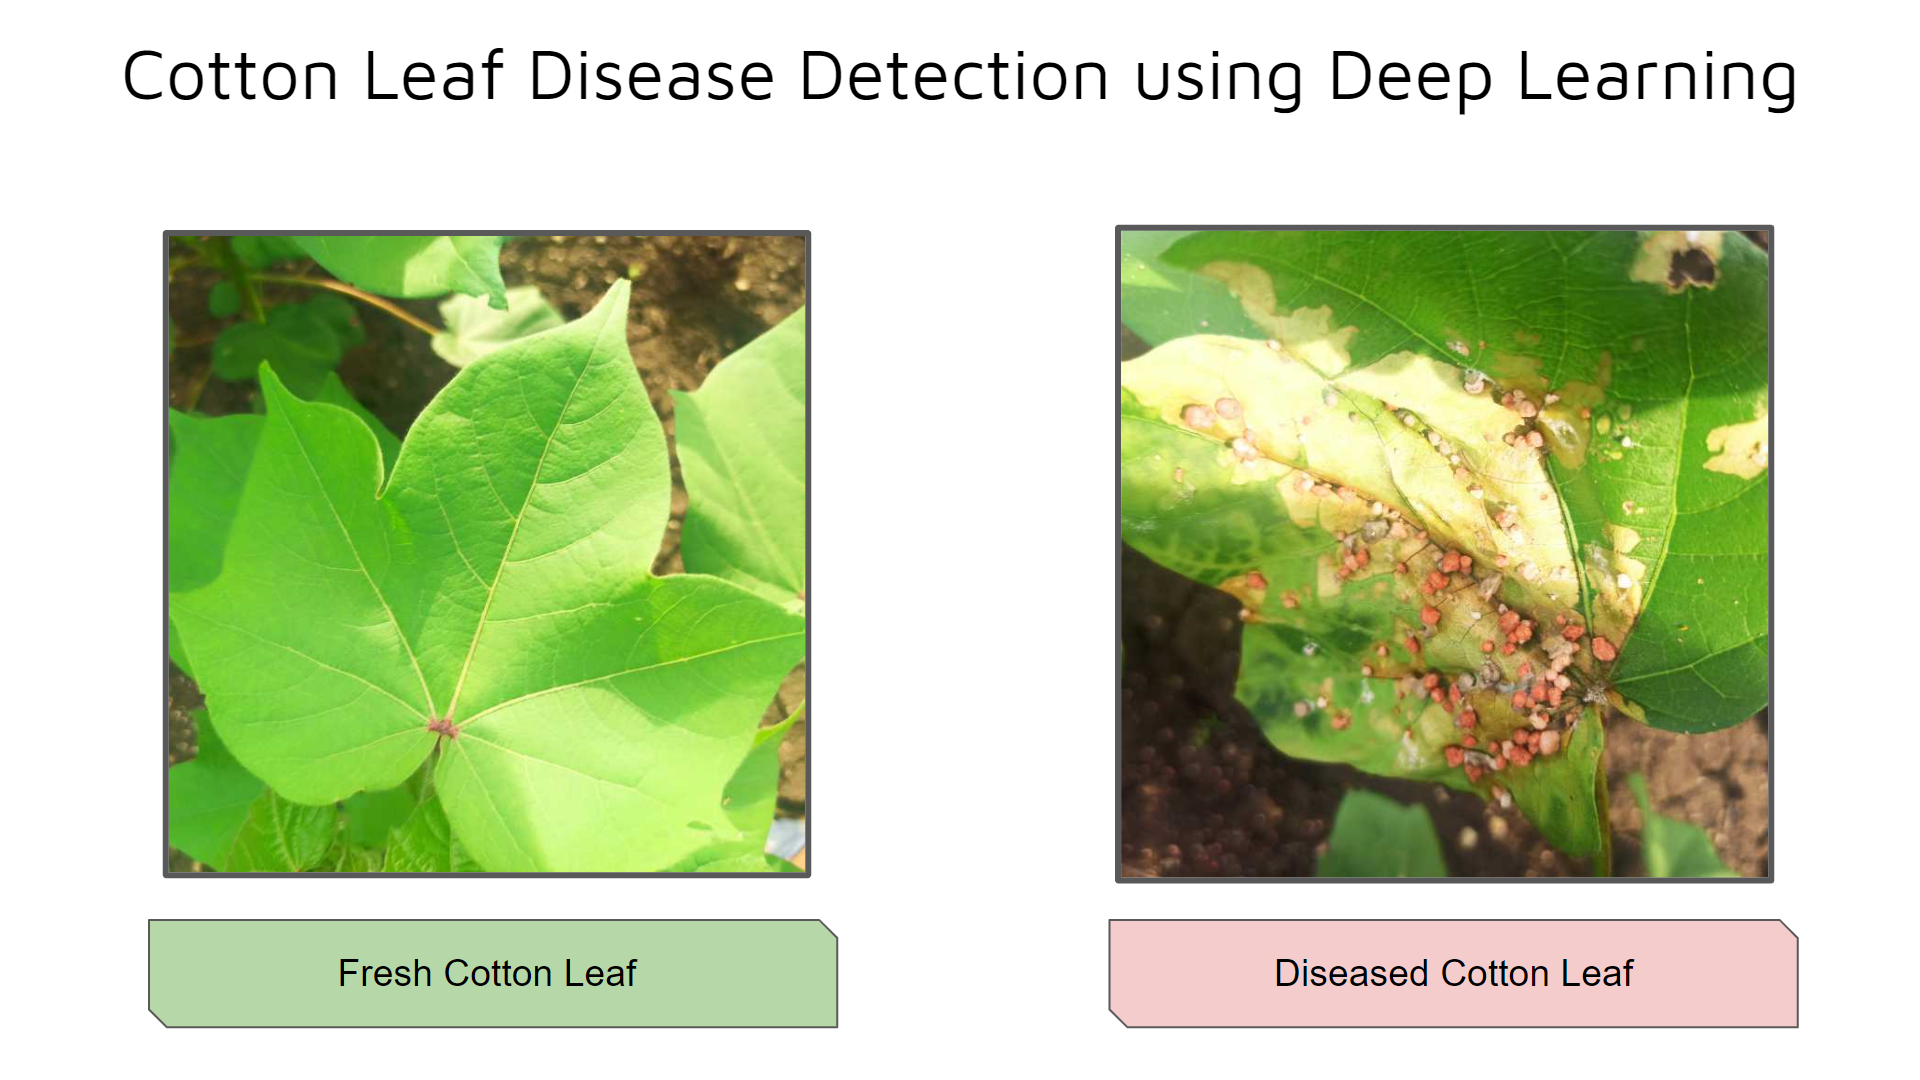

<h1>Dataset</h1>

<b>Parent Dataset Link : </b> [Click Here](https://www.kaggle.com/janmejaybhoi/cotton-disease-dataset)



<b>Dataset used for this project : </b> [Click Here](https://drive.google.com/drive/folders/1He8eQ3raIGrbVvNwhhNK5ELFnoiE3dQk?usp=sharing)

------------------------

<h3>Dataset Description:</h3>

Dataset consist of images of fresh and diseased cotton leaves.

||<h4>Training Data</h4>|<h4>Validation Data</h4>|
|------|------|------|
|<h5>No. of Fresh Cotton Leaf Images</h5>|<h6><b>427</b></h6>|<h6><b>80</b> </h6>    |
|<h5>No. of Diseased Cotton Leaf Images</h5>|<h6><b>288</b></h6>|<h6><b>55</b><h6>|
|<h5>Total No. of Images</h5>|<h6><b>715</b></h6>|<h6><b>135</b></h6>|



<h3>Libraries Required</h3>


*   Keras (Interface for Tensorflow Library)
*   Matplotlib (For plotting images and graphs)
*   Numpy (For dealing with multi-dimentional arrays)



#Importing the libraries

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
train_images = "/content/drive/MyDrive/Cotton Leaf Disease Prediction Dataset/train_leaf"

In [ ]:

training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

training_data = training_datagen.flow_from_directory(train_images, target_size=(150, 150), class_mode='binary') 

Found 715 images belonging to 2 classes.


In [ ]:
training_data.class_indices

{'diseased cotton leaf': 0, 'fresh cotton leaf': 1}

In [ ]:
np.unique(training_data.labels, return_counts=True)

(array([0, 1], dtype=int32), array([288, 427]))

In [ ]:
testing_images = '/content/drive/MyDrive/Cotton Leaf Disease Prediction Dataset/test_leaf'

In [ ]:
testing_datagen = ImageDataGenerator(rescale=1./255)

testing_data = testing_datagen.flow_from_directory(testing_images, target_size=(150, 150), class_mode='binary') 

Found 135 images belonging to 2 classes.


In [ ]:
model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3,activation='relu', input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64,activation='relu', kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128,activation='relu', kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256,activation='relu', kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), 
                                    keras.layers.Dense(units=128, activation='relu'), 
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=1, activation='sigmoid') 
])


# model.compile(optimizer = Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model = keras.models.Sequential()
                                    model.add(keras.layers.Conv2D(filters=32, kernel_size=3,activation='relu', input_shape=[150, 150, 3]))
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64,activation='relu', kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128,activation='relu', kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256,activation='relu', kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), 
                                    keras.layers.Dense(units=128, activation='relu'), 
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=1, activation='sigmoid') 
])


model.compile(optimizer = Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 256)      

In [ ]:
checkpoint_filepath = 'model.h5'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
history = model.fit(training_data, epochs=100,validation_data=testing_data,callbacks=[model_checkpoint_callback])

Epoch 1/100
23/23 [==============================] - 179s 8s/step - loss: 0.6800 - accuracy: 0.5986 - val_loss: 0.6681 - val_accuracy: 0.5926
Epoch 2/100
23/23 [==============================] - 11s 479ms/step - loss: 0.6699 - accuracy: 0.6000 - val_loss: 0.6536 - val_accuracy: 0.5926
Epoch 3/100
23/23 [==============================] - 11s 474ms/step - loss: 0.6465 - accuracy: 0.6168 - val_loss: 0.5908 - val_accuracy: 0.6519
Epoch 4/100
23/23 [==============================] - 11s 475ms/step - loss: 0.5972 - accuracy: 0.7063 - val_loss: 0.4957 - val_accuracy: 0.8000
Epoch 5/100
23/23 [==============================] - 11s 475ms/step - loss: 0.5409 - accuracy: 0.7343 - val_loss: 0.3975 - val_accuracy: 0.8593
Epoch 6/100
23/23 [==============================] - 11s 472ms/step - loss: 0.5209 - accuracy: 0.7441 - val_loss: 0.4103 - val_accuracy: 0.8444
Epoch 7/100
23/23 [==============================] - 11s 471ms/step - loss: 0.4156 - accuracy: 0.8238 - val_loss: 0.3690 - val_accuracy: 0

In [ ]:
model.evaluate(testing_data)

5/5 [==============================] - 1s 221ms/step - loss: 0.0307 - accuracy: 0.9852


[0.03071502037346363, 0.9851852059364319]

In [ ]:
model.save("nn_model.h5")

In [ ]:
loss = history.history['loss']

accuracy = history.history['accuracy']

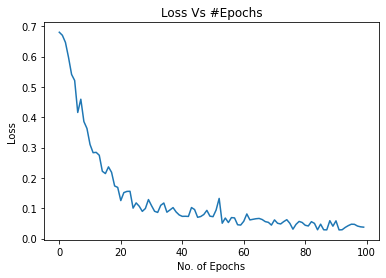

In [ ]:

plt.plot(loss)
plt.title("Loss Vs #Epochs")
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.show()

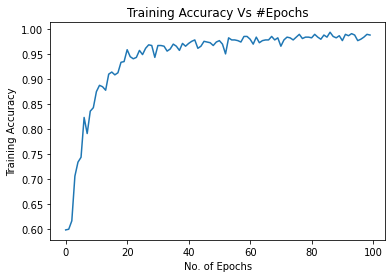

In [ ]:

plt.plot(accuracy)
plt.title("Training Accuracy Vs #Epochs")
plt.xlabel("No. of Epochs")
plt.ylabel("Training Accuracy")
plt.show()